### Baby Names
LinkedIn: Python Data Analysis (Michele Vallisneri)

In [2]:
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

In [3]:
pd.options.display.max_rows = 8

In [4]:
import zipfile

In [5]:
zipfile.ZipFile('names.zip').extractall('.')

In [6]:
ls

names/  names.ipynb  names.zip*


In [7]:
ls names

NationalReadMe.pdf  yob1907.txt  yob1935.txt  yob1963.txt  yob1991.txt
yob1880.txt         yob1908.txt  yob1936.txt  yob1964.txt  yob1992.txt
yob1881.txt         yob1909.txt  yob1937.txt  yob1965.txt  yob1993.txt
yob1882.txt         yob1910.txt  yob1938.txt  yob1966.txt  yob1994.txt
yob1883.txt         yob1911.txt  yob1939.txt  yob1967.txt  yob1995.txt
yob1884.txt         yob1912.txt  yob1940.txt  yob1968.txt  yob1996.txt
yob1885.txt         yob1913.txt  yob1941.txt  yob1969.txt  yob1997.txt
yob1886.txt         yob1914.txt  yob1942.txt  yob1970.txt  yob1998.txt
yob1887.txt         yob1915.txt  yob1943.txt  yob1971.txt  yob1999.txt
yob1888.txt         yob1916.txt  yob1944.txt  yob1972.txt  yob2000.txt
yob1889.txt         yob1917.txt  yob1945.txt  yob1973.txt  yob2001.txt
yob1890.txt         yob1918.txt  yob1946.txt  yob1974.txt  yob2002.txt
yob1891.txt         yob1919.txt  yob1947.txt  yob1975.txt  yob2003.txt
yob1892.txt         yob1920.txt  yob1948.txt  yob1976.txt  yob2004.txt
yob189

In [8]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [9]:
pd.read_csv('names/yob2011.txt')

,Sophia,F,21842
0,Isabella,F,19910
1,Emma,F,18803
2,Olivia,F,17322
3,Ava,F,15503
...,...,...,...
33903,Zylas,M,5
33904,Zyran,M,5
33905,Zyshawn,M,5
33906,Zytavion,M,5


In [10]:
pd.read_csv('names/yob2011.txt', names=['name','sex','number'])

,name,sex,number
0,Sophia,F,21842
1,Isabella,F,19910
2,Emma,F,18803
3,Olivia,F,17322
...,...,...,...
33904,Zylas,M,5
33905,Zyran,M,5
33906,Zyshawn,M,5
33907,Zytavion,M,5


In [11]:
# load CSV file as DataFrame, then create a new column "year" with all elements set to 2011
pd.read_csv('names/yob2011.txt', names=['name','sex','number']).assign(year=2011)

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
...,...,...,...,...
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011
33907,Zytavion,M,5,2011


In [13]:
# for each year in 1880-2018, load the corresponding CSV file names/yobXXXX.txt
# as DataFrame, create new column "year" with all elements set to loop variable,
# then concatenate all DataFrames into a single one
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt',
                                 names=['name','sex','number']).assign(year=year)
                     for year in range(1880, 2019))

In [14]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [15]:
allyears.year.min(), allyears.year.max()

(1880, 2018)

In [16]:
# save DataFrame to compressed CSV file, dropping uninteresting index
allyears.to_csv('allyears.csv.gz', index=False)

In [17]:
pd.options.display.max_rows = 6

In [18]:
allyears = pd.read_csv('allyears.csv.gz')

In [19]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [20]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [21]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2016,2508
2017,2402
2018,2327


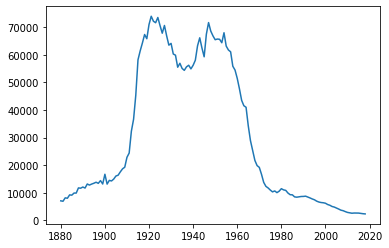

In [22]:
pp.plot(allyears_indexed.loc[('F','Mary')])

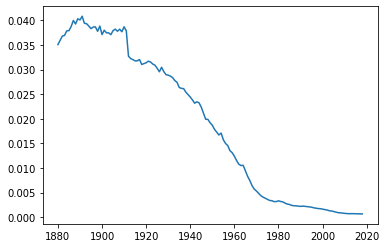

In [24]:
# normalize F/Mary time series by the total number of births each year
pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [26]:
# plot number of sex/name babies as a function of year
def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2018)

In [27]:
# combine several "plotname()" plots for given sex and list of names
def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))
    for name in names:
        plotname(sex, name)
    pp.legend()

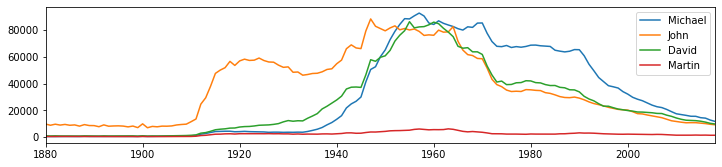

In [28]:
comparenames('M', ['Michael','John','David','Martin'])

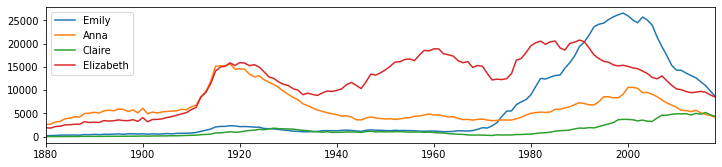

In [29]:
comparenames('F', ['Emily','Anna','Claire','Elizabeth'])

In [30]:
claires = ['Claire','Clare','Clara','Chiara','Ciara']

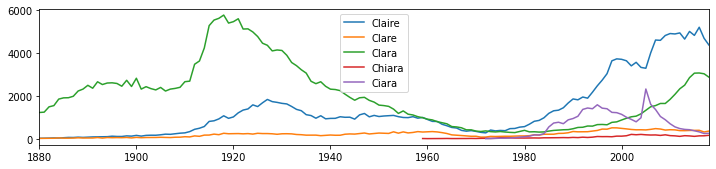

In [31]:
comparenames('F', claires)

In [32]:
allyears_indexed.loc[('F',claires),:]

number
sex name   year        
F   Chiara 1959       9
           1960       5
           1962       8
...                 ...
    Clare  2016     394
           2017     315
           2018     357

[522 rows x 1 columns]

In [33]:
# "pivot" the third level of the multiindex (years) to create a row of columns;
# result is names (rows) x years (columns)
allyears_indexed.loc[('F',claires),:].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   
    Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  
    Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Clare    386.0   389.0   394.0   315.0   357.0  

[5 rows x 139 columns]

In [34]:
# "pivot" the third level of the multiindex (names) to create a row of columns
allyears_indexed.loc[('F',claires),:].unstack(level=1)

number                              
name     Chiara  Ciara  Claire   Clara  Clare
sex year                                     
F   1880    NaN    NaN    21.0  1226.0   15.0
    1881    NaN    NaN    23.0  1242.0   20.0
    1882    NaN    NaN    30.0  1490.0   21.0
...         ...    ...     ...     ...    ...
    2016  134.0  321.0  5209.0  3072.0  394.0
    2017  137.0  243.0  4693.0  3035.0  315.0
    2018  160.0  256.0  4379.0  2877.0  357.0

[139 rows x 5 columns]

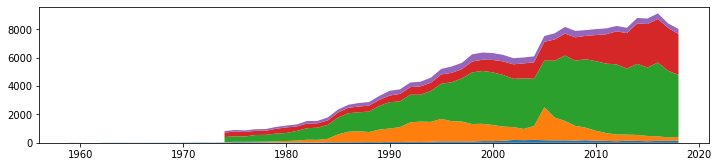

In [36]:
# make a stacked (cumulative) area plot using names x years table 
pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2));

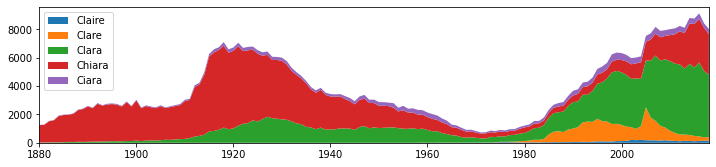

In [37]:
# fix stacked plot by filling NaNs with zeros, adding labels, setting axis range
pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2).fillna(0),
             labels=claires);
pp.legend(loc='upper left')
pp.axis(xmin=1880, xmax=2018);

In [58]:
pd.options.display.max_rows = 10

In [59]:
allyears = pd.read_csv('allyears.csv.gz')

In [60]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

In [61]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
    2018    James   13525
    2018   Oliver   13389
...           ...     ...
    2018   Gaylon       5
    2018   Gavynn       5
    2018    Gavon       5
    2018   Gaurav       5
    2018    Zzyzx       5

[14004 rows x 2 columns]

In [42]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

In [43]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                   
F   2018       Emma   18688
    2018     Olivia   17921
    2018        Ava   14924
    2018   Isabella   14464
    2018     Sophia   13928
    2018  Charlotte   12940
    2018        Mia   12642
    2018     Amelia   12301
    2018     Harper   10582
    2018     Evelyn   10376

In [44]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10).reset_index().name

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [45]:
# get the top ten names for sex and year
def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [46]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [47]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [49]:
# similar to plotname in 07_03_popularity, but using a query on unindexed data
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin=1880, xmax=2018)

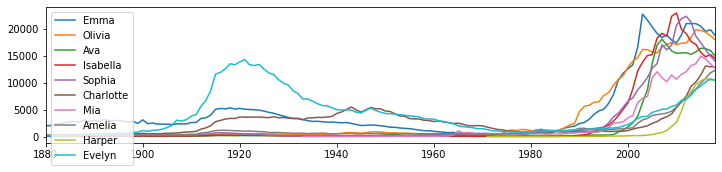

In [50]:
pp.figure(figsize=(12,2.5))
for name in getyear('F',2018):
    plotname('F', name)
pp.legend()

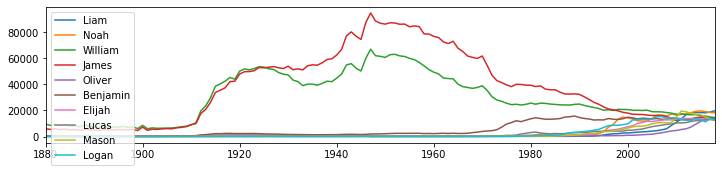

In [52]:
pp.figure(figsize=(12,2.5))
for name in getyear('M',2018):
    plotname('M', name)
pp.legend()

In [53]:
list(getyear('M',2018))

['Liam',
 'Noah',
 'William',
 'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']

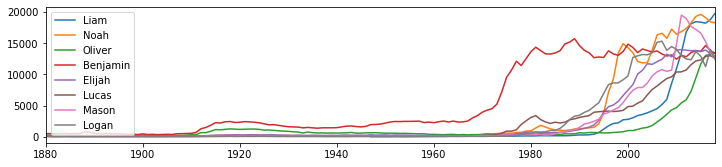

In [54]:
pp.figure(figsize=(12,2.5))
for name in ['Liam','Noah','Oliver','Benjamin','Elijah','Lucas','Mason','Logan']:
    plotname('M', name)
pp.legend()

In [55]:
# get all time favorites: select F, group by name, sum over years, sort, cap 
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [56]:
alltime_f

,number
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


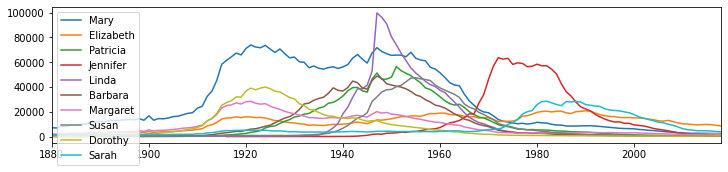

In [57]:
pp.figure(figsize=(12,2.5))
for name in alltime_f.index:
    plotname('F', name)
pp.legend()

In [62]:
pd.options.display.max_rows = 10

In [63]:
allyears = pd.read_csv('allyears.csv.gz')

In [64]:
# total number across all years, grouped by sex and name
totals = allyears.groupby(['sex','name']).number.sum()

In [65]:
totals

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

In [66]:
# split into male and female totals
male, female = totals.loc['M'], totals.loc['F']

In [67]:
male

name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64

In [68]:
female

name
Aabha        35
Aabidah       5
Aabriella    38
Aada         13
Aadaya        8
             ..
Zyrielle     27
Zyrihanna    45
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

In [69]:
totals.loc['M'] / totals.loc['F'] < 2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 98400, dtype: bool

In [70]:
# compute ratio of male and female totals (Pandas aligns axes automatically);
# drop NaNs that occur where only one Series has a value
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

In [71]:
ratios[(ratios > 0.5) & (ratios < 2)]

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
             ...   
Ziyan      1.251748
Zoel       1.928571
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: number, Length: 1660, dtype: float64

In [72]:
# names that fit the unisex ratio constraint
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

In [73]:
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [74]:
# sorted and capped M + F totals for unisex names;
# results in array of top ten unisex counts, indexed by name
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [75]:
common

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: number, dtype: int64

In [76]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

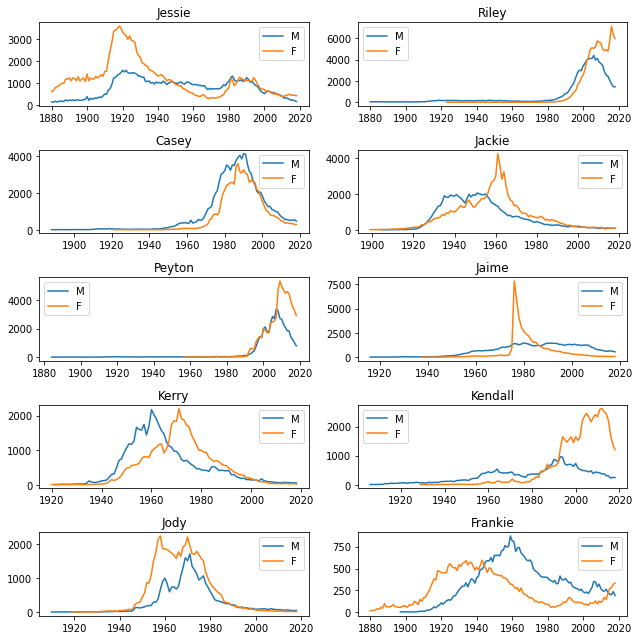

In [77]:
pp.figure(figsize=(9,9))

# loop over top-ten unisex names
for i, name in enumerate(common.index):
    pp.subplot(5,2,i+1)
    pp.plot(allyears_indexed.loc['M',name], label='M')
    pp.plot(allyears_indexed.loc['F',name], label='F')
    pp.legend()
    pp.title(name)

# improve subplot spacing
pp.tight_layout()